In [72]:
import os
import random
import shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [ ]:
path = kagglehub.dataset_download("maysee/mushrooms-classification-common-genuss-images")


Resuming download from 7340032 bytes (1983510598 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/maysee/mushrooms-classification-common-genuss-images?dataset_version_number=1 (7340032/1990850630) bytes left.


100%|██████████| 1.85G/1.85G [02:57<00:00, 11.2MB/s]

Extracting files...


Path to dataset files: /home/v131v/.cache/kagglehub/datasets/maysee/mushrooms-classification-common-genuss-images/versions/1


In [10]:
def move_random_files(source_folder, target_folder, ratio=0.2):
    """
    Перемещает случайные файлы из source_folder в target_folder в заданной пропорции.

    :param source_folder: Путь к исходной папке с файлами.
    :param target_folder: Путь к целевой папке для перемещения.
    :param ratio: Доля файлов для перемещения (от 0 до 1).
    """
    # Создаем папку, если она не существует
    os.makedirs(target_folder, exist_ok=True)

    # Получаем список всех файлов в исходной папке
    files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

    # Определяем количество файлов для перемещения
    num_files_to_move = int(len(files) * ratio)

    # Выбираем случайные файлы
    files_to_move = random.sample(files, num_files_to_move)

    # Перемещаем файлы
    for file_name in files_to_move:
        source_path = os.path.join(source_folder, file_name)
        target_path = os.path.join(target_folder, file_name)
        shutil.move(source_path, target_path)

    print(f"Перемещено {len(files_to_move)} файлов из {source_folder} в {target_folder}.")

source_folder = f"{path}/Mushrooms"
classes = os.listdir(source_folder)

for mushroom in classes:
    move_random_files(f"{source_folder}/{mushroom}", f"./train/{mushroom}")

for mushroom in classes:
    move_random_files(f"{source_folder}/{mushroom}", f"./test/{mushroom}", ratio=1)


Перемещено 167 файлов из /home/v131v/.cache/kagglehub/datasets/maysee/mushrooms-classification-common-genuss-images/versions/1/Mushrooms/Cortinarius в ./train/Cortinarius.
Перемещено 70 файлов из /home/v131v/.cache/kagglehub/datasets/maysee/mushrooms-classification-common-genuss-images/versions/1/Mushrooms/Agaricus в ./train/Agaricus.
Перемещено 72 файлов из /home/v131v/.cache/kagglehub/datasets/maysee/mushrooms-classification-common-genuss-images/versions/1/Mushrooms/Entoloma в ./train/Entoloma.
Перемещено 150 файлов из /home/v131v/.cache/kagglehub/datasets/maysee/mushrooms-classification-common-genuss-images/versions/1/Mushrooms/Amanita в ./train/Amanita.
Перемещено 214 файлов из /home/v131v/.cache/kagglehub/datasets/maysee/mushrooms-classification-common-genuss-images/versions/1/Mushrooms/Boletus в ./train/Boletus.
Перемещено 312 файлов из /home/v131v/.cache/kagglehub/datasets/maysee/mushrooms-classification-common-genuss-images/versions/1/Mushrooms/Lactarius в ./train/Lactarius.
Пе

In [85]:
train_dir = "train"
test_dir = 'test'

image_size = (300, 300)
batch_size = 64
epochs = 5

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
	shuffle=True,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
	shuffle=True,
)

images, labels = next(train_generator)
print(f"Batch shape: {images.shape}")


Found 5375 images belonging to 9 classes.
Found 1339 images belonging to 9 classes.
Batch shape: (64, 300, 300, 3)


In [ ]:
model = Sequential([
    Input(shape=(300, 300, 3)),

    Conv2D(64, (10, 10), activation='relu'),
    MaxPooling2D((2, 2)),
	Dropout(0.25),

    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
   	Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
   	Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
   	Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
   	Dropout(0.25),

    Flatten(),

    Dense(128, activation='relu'),
	Dropout(0.1),

   	Dense(128, activation='relu'),
   	Dropout(0.1),

    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
)


Epoch 1/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 0.2069 - loss: 2.0996 - val_accuracy: 0.2359 - val_loss: 2.0636
Epoch 2/5
 1/83 ━━━━━━━━━━━━━━━━━━━━ 3:47 3s/step - accuracy: 0.1719 - loss: 2.1654

/home/v131v/.local/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


83/83 ━━━━━━━━━━━━━━━━━━━━ 23s 241ms/step - accuracy: 0.1719 - loss: 2.1654 - val_accuracy: 0.2305 - val_loss: 2.0682
Epoch 3/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 266s 3s/step - accuracy: 0.2444 - loss: 2.0404 - val_accuracy: 0.2313 - val_loss: 2.0376
Epoch 4/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 240ms/step - accuracy: 0.1719 - loss: 2.1392 - val_accuracy: 0.2336 - val_loss: 2.0430
Epoch 5/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.2327 - loss: 2.0508 - val_accuracy: 0.2383 - val_loss: 2.0384


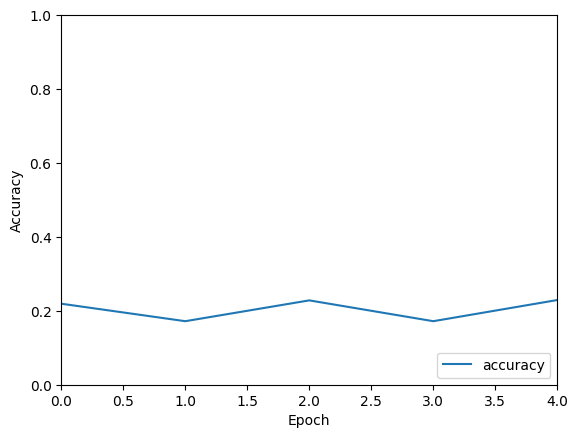

In [87]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlim([0, epochs-1])
plt.legend(loc='lower right')
plt.show()


In [83]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 798ms/step - accuracy: 0.2308 - loss: 2.0384
Test Loss: 2.0390267372131348, Test Accuracy: 0.2330097109079361


In [ ]:
model.save('lego_classifier_model.h5')
